In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency, chi2

In [2]:
users_test = pd.read_csv('C:/Users/User/projects/final_project/Проект_3_users_test.csv', sep=';')
users_control_1 = pd.read_csv('C:/Users/User/projects/final_project/Проект_3_users_control_1.csv', sep=';')
users_control_2 = pd.read_csv('C:/Users/User/projects/final_project/Проект_3_users_control_2.csv', sep=';')
transactions_test = pd.read_csv('C:/Users/User/projects/final_project/Проект_3_transactions_test.csv', sep=';')
transactions_control_1 = pd.read_csv('C:/Users/User/projects/final_project/Проект_3_transactions_control_1.csv', sep=';')
transactions_control_2 = pd.read_csv('C:/Users/User/projects/final_project/Проект_3_transactions_control_2.csv', sep=';')

In [3]:
# Этап №1. Для эксперимента были сформированы две контрольные группы. Проведем А/А-тест, сравнив показатели в двух этих 
# группах, чтобы убедиться, что контрольные группы валидны

In [4]:
# Смотрим на данные по пользователям в контрольной группе №1
users_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


In [5]:
users_control_1.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

In [6]:
users_control_1_c = users_control_1.copy()

In [7]:
# Меняем пропущенные значения на 0 и приводим к целочисленному типу
users_control_1_c.coins.fillna(0, inplace=True)
users_control_1_c['coins'] = users_control_1_c['coins'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_11124\1046918710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_control_1_c.coins.fillna(0, inplace=True)


In [8]:
# Меняем пропущенные значения на False, а остальные значения на True
users_control_1_c['was_premium'] = users_control_1['was_premium'].notna()

In [9]:
users_control_1_c['is_premium'] = users_control_1['is_premium'].notna()

In [10]:
# Проверяем
users_control_1_c.groupby('was_premium', as_index=False).agg({'age': 'count'})

,was_premium,age
0,False,3904
1,True,436


In [11]:
users_control_1_c.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins                  0
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium            0
is_premium             0
total_revenue          0
dtype: int64

In [12]:
# Меняем значения гендера на строковые
users_control_1_c['gender'] = users_control_1_c['gender'].replace({1: 'male', 0: 'female'})

In [13]:
users_control_1_c.groupby('gender', as_index=False).agg({'age': 'count'})

,gender,age
0,female,182
1,male,4158


In [14]:
# Рассчитаем соотношение мужчин и женщин среди пользователей 
users_control_1_c.gender.value_counts(normalize=True).mul(100)

gender
male      95.806452
female     4.193548
Name: proportion, dtype: float64

In [15]:
# Наблюдаем сильный перекос в соотношении полов пользователей, далее посмотрим на это распределение в других группах

In [16]:
users_control_1_c.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,0,United States of America,"1,2,3,4,5,6",female,22,32,982,False,False,0
1,891248523,29,500,0,United States of America,"1,2",male,26,32,12,False,False,0
2,891670932,33,800,0,France,"1,2,3,5,6,8,9,11,13,16",male,30,36,5,False,False,0
3,891060786,26,0,0,Argentina,"1,2,3,4,5",male,23,29,0,False,False,0
4,892006554,35,294,0,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",male,30,40,17,False,False,0


In [17]:
# Проверим корректность рандомизации при формировании контрольных групп, посмотрим на распределение возраста 
# пользователей

C:\Users\User\AppData\Local\Temp\ipykernel_11124\2746887200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users_control_1_c.age)


<Axes: xlabel='age', ylabel='Density'>

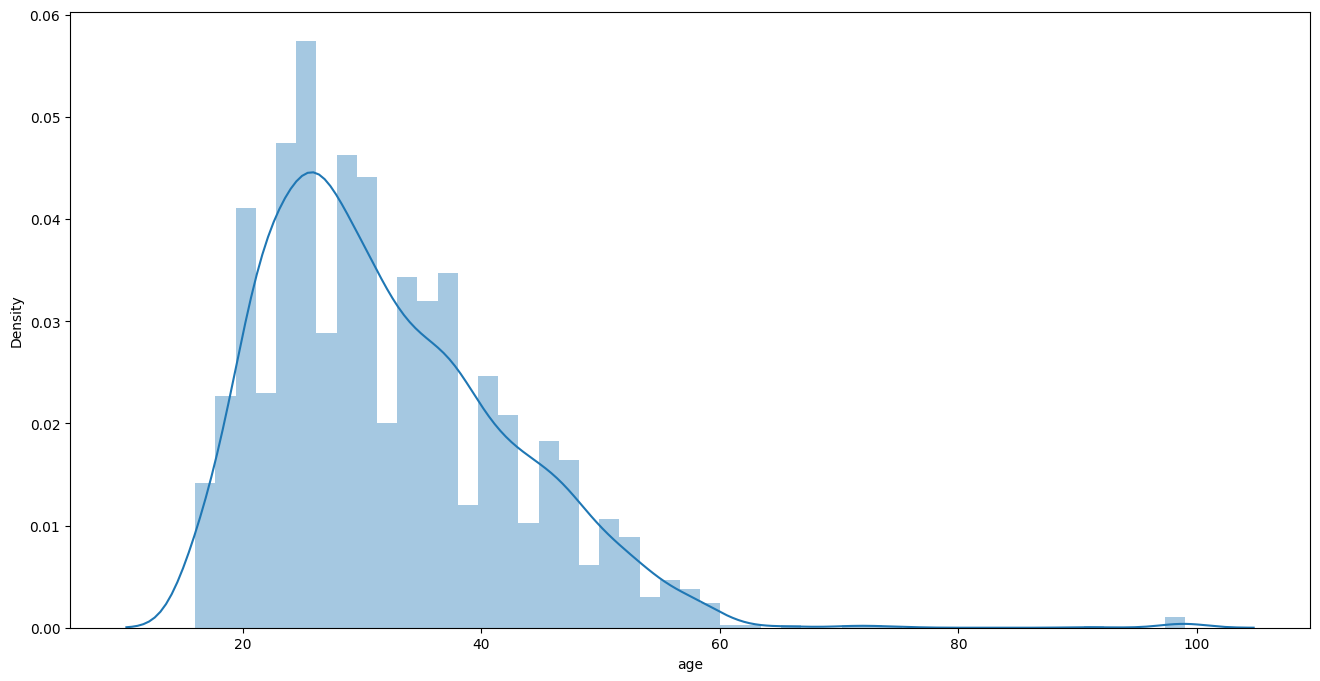

In [18]:
# Строим график распределения возраста пользователей в контрольной группе №1
fig = plt.figure(figsize=(16, 8))
sns.distplot(users_control_1_c.age)

In [19]:
# Распределение не является нормальным и содержит выбросы, для сравнения распределения будем использовать критерий 
# Манна-Уитни

In [20]:
# Смотрим на данные по пользователям в контрольной группе №2
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


In [21]:
users_control_2.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3853
is_premium          4073
total_revenue          0
dtype: int64

In [22]:
users_control_2_c = users_control_2.copy()

In [23]:
# Меняем пропущенные значения на 0 и приводим к целочисленному типу
users_control_2_c.coins.fillna(0, inplace=True)
users_control_2_c['coins'] = users_control_2_c['coins'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_11124\1192609595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_control_2_c.coins.fillna(0, inplace=True)


In [24]:
# Меняем пропущенные значения на False, а остальные значения на True
users_control_2_c['was_premium'] = users_control_2['was_premium'].notna()

In [25]:
users_control_2_c['is_premium'] = users_control_2['is_premium'].notna()

In [26]:
users_control_2_c.groupby('is_premium', as_index=False).agg({'age': 'count'})

,is_premium,age
0,False,4073
1,True,191


In [27]:
users_control_2_c.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins                  0
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium            0
is_premium             0
total_revenue          0
dtype: int64

In [28]:
# Меняем значения гендера на строковые
users_control_2_c['gender'] = users_control_2_c['gender'].replace({1: 'male', 0: 'female'})

In [29]:
users_control_2_c.groupby('gender', as_index=False).agg({'age': 'count'})

,gender,age
0,female,195
1,male,4069


In [30]:
# Рассчитаем соотношение полов в контрольной группе №2
users_control_2_c.gender.value_counts(normalize=True).mul(100)

gender
male      95.426829
female     4.573171
Name: proportion, dtype: float64

In [31]:
# Сравним с контрольной группой №1 
users_control_1_c.gender.value_counts(normalize=True).mul(100)

gender
male      95.806452
female     4.193548
Name: proportion, dtype: float64

In [32]:
# Наблюдаем, что распределения полов пользователей в контрольных группах похожи, проверим, нет ли статистически значимых 
# различий, применив хи-квадрат

In [33]:
# Так как контрольные группы между собой мы будем сравнивать двумя тестами, сделаем поправку на множественные сравнения 
# Бонферрони

In [34]:
# Скорректированный уровень значимости для сравнения контрольных групп
alpha_1 = 0.05
n_tests_1 = 2
alpha_corr_1 = round(alpha_1 / n_tests_1, 4)
alpha_corr_1

0.025

In [35]:
# H0: распределение полов пользователей в группах не различается
# H1: различие есть 

In [36]:
# Подготовим датафрейм для теста

In [37]:
data_gender_control_1 = users_control_1_c[['uid', 'gender']]
data_gender_control_1['group'] = 'control'

C:\Users\User\AppData\Local\Temp\ipykernel_11124\3241583641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gender_control_1['group'] = 'control'


In [38]:
data_gender_control_2 = users_control_2_c[['uid', 'gender']]
data_gender_control_2['group'] = 'control_2'

C:\Users\User\AppData\Local\Temp\ipykernel_11124\1406904779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gender_control_2['group'] = 'control_2'


In [39]:
data_total_0 = pd.merge(data_gender_control_1, data_gender_control_2, on=['uid', 'gender', 'group'], how='outer')
data_total_0.head()

,uid,gender,group
0,891050916,female,control_2
1,891050997,male,control
2,891051075,female,control_2
3,891051552,male,control
4,891051606,male,control


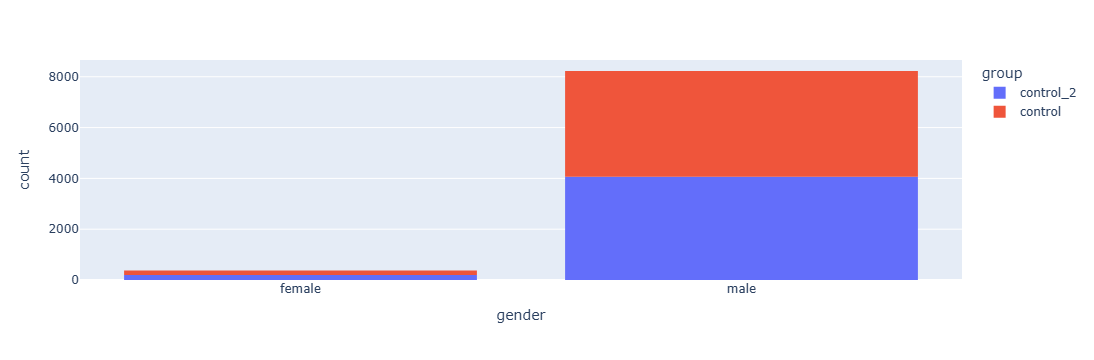

In [40]:
# Построим график соотношений
fig = px.histogram(data_total_0[['gender', 'group']], x='gender', color='group')
fig.show()

In [41]:
# Наглядно наблюдаем сильный перекос в распределении полов в обоих группах, а различий между группами не видно

In [42]:
# На основе датафрейма создаем кросс-таблицу
data_chi2_0 = pd.crosstab(data_total_0.group, data_total_0.gender)
data_chi2_0

gender,female,male
group,,
control,182,4158
control_2,195,4069


In [43]:
# Проведем тест
stat, p, dof, expectend = chi2_contingency(data_chi2_0)
stat, p

(np.float64(0.651988939681188), np.float64(0.41940247806709796))

In [44]:
# Вывод: значение p-value > 0.025, принимаем нулевую гипотезу, значимых различий в группах не обнаружено

C:\Users\User\AppData\Local\Temp\ipykernel_11124\488528429.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='age', ylabel='Density'>

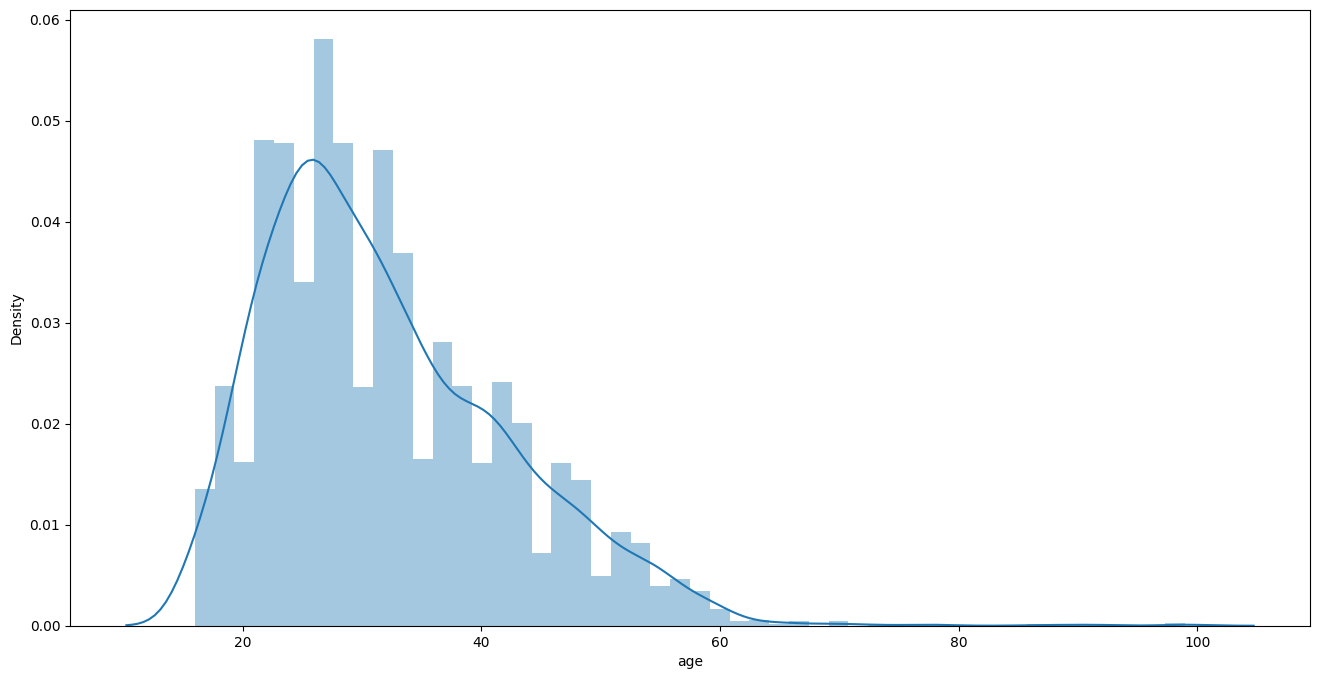

In [45]:
# Строим график распределения возраста пользователей в контрольной группе №2
fig = plt.figure(figsize=(16, 8))
sns.distplot(users_control_2_c.age)

In [46]:
# Распределение возраста аналогично контрольной группе №1, используем для сравнения критерий Манна-Уитни

In [47]:
# H0: распределение показателя в группах не различается
# H1: различается

In [48]:
x = users_control_1_c.age
y = users_control_2_c.age

In [49]:
mannwhitneyu(x, y, method='auto')

MannwhitneyuResult(statistic=np.float64(9283252.5), pvalue=np.float64(0.7919291369256963))

In [50]:
# Значение p-value > 0.025, принимаем H0 - распределение показателя в группах не различается

In [51]:
# Вывод: контрольные группы сформированы корректно. Далее посмотрим на распределения возраста и полов пользователей 
# в тестовой группе и сравним с контрольной группой №1

In [52]:
# Смотрим на данные по пользователям тестовой группы 

In [53]:
users_test.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0


In [54]:
# Смотрим пропущенные значения
users_test.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

In [55]:
# Делаем копию датасета
users_test_c = users_test.copy()

In [56]:
# Меняем пропущенные значения на False, а остальные значения на True
users_test_c['was_premium'] = users_test['was_premium'].notna()

In [57]:
users_test_c['is_premium'] = users_test['is_premium'].notna()

In [58]:
# Проверяем данные
users_test_c.groupby('was_premium', as_index=False).agg({'age': 'count'})

,was_premium,age
0,False,3900
1,True,408


In [59]:
# Меняем пропущенные значения на 0
users_test_c.coins.fillna(0, inplace=True)
users_test_c['coins'] = users_test_c['coins'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_11124\2365902853.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [60]:
# Меняем значения гендера на строковые
users_test_c['gender'] = users_test_c['gender'].replace({1: 'male', 0: 'female'})

In [61]:
users_test_c.groupby('gender', as_index=False).agg({'age': 'count'})

,gender,age
0,female,202
1,male,4106


In [62]:
# Посмотрим на распределение полов среди пользователей тестовой группы
users_test_c.gender.value_counts(normalize=True).mul(100)

gender
male      95.311049
female     4.688951
Name: proportion, dtype: float64

In [63]:
# Сравним с контрольной группой 
users_control_1_c.gender.value_counts(normalize=True).mul(100)

gender
male      95.806452
female     4.193548
Name: proportion, dtype: float64

In [64]:
# Проверим с помощью хи-квадрата, нет ли значимых различий в распределении полов между группами

In [65]:
# Так как в рамках эксперимента мы будем проводить 7 тестов сравнения тестовой группы с контрольной, применим поправку 
# на множественные сравнения Бонферрони

In [66]:
# Скорректированный уровень значимости для сравнения тестовой и контрольной групп
alpha = 0.05
n_tests = 7
alpha_corr = round(alpha / n_tests, 4)
alpha_corr

0.0071

In [67]:
# H0: значимых различий между группами нет 
# H1: различия есть 

In [68]:
# Подготовим DataFrame для теста

In [69]:
data_gender_test = users_test_c[['uid', 'gender']]
data_gender_test['group'] = 'test'

C:\Users\User\AppData\Local\Temp\ipykernel_11124\259862270.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
data_gender_control_1.head()

,uid,gender,group
0,892319115,female,control
1,891248523,male,control
2,891670932,male,control
3,891060786,male,control
4,892006554,male,control


In [71]:
data_total = pd.merge(data_gender_test, data_gender_control_1, on=['uid', 'gender', 'group'], how='outer')
data_total.head()

,uid,gender,group
0,891050997,male,control
1,891051147,male,test
2,891051552,male,control
3,891051606,male,control
4,891052698,male,control


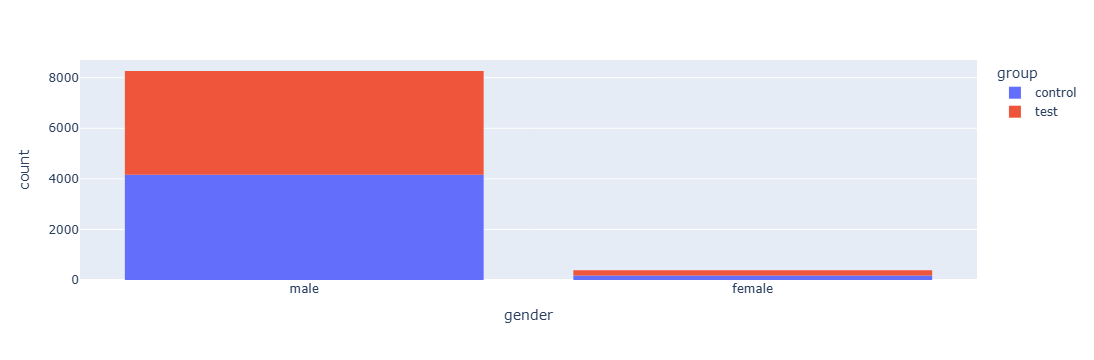

In [72]:
# Построим график соотношений
fig = px.histogram(data_total[['gender', 'group']], x='gender', color='group')
fig.show()

In [73]:
# Наглядно наблюдаем, какой сильный перекос в распределении полов в обоих группах, а различий между группами не видно

In [74]:
# На основе датафрейма создаем кросс-таблицу
data_chi2 = pd.crosstab(data_total.group, data_total.gender)
data_chi2

gender,female,male
group,,
control,182,4158
test,202,4106


In [75]:
# Проведем тест
stat, p, dof, expectend = chi2_contingency(data_chi2)
stat, p

(np.float64(1.1364494716908673), np.float64(0.28640382402109243))

In [76]:
# Вывод: значение p-value > 0.0071, принимаем нулевую гипотезу, значимых различий в группах не обнаружено

C:\Users\User\AppData\Local\Temp\ipykernel_11124\2353037001.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='age', ylabel='Density'>

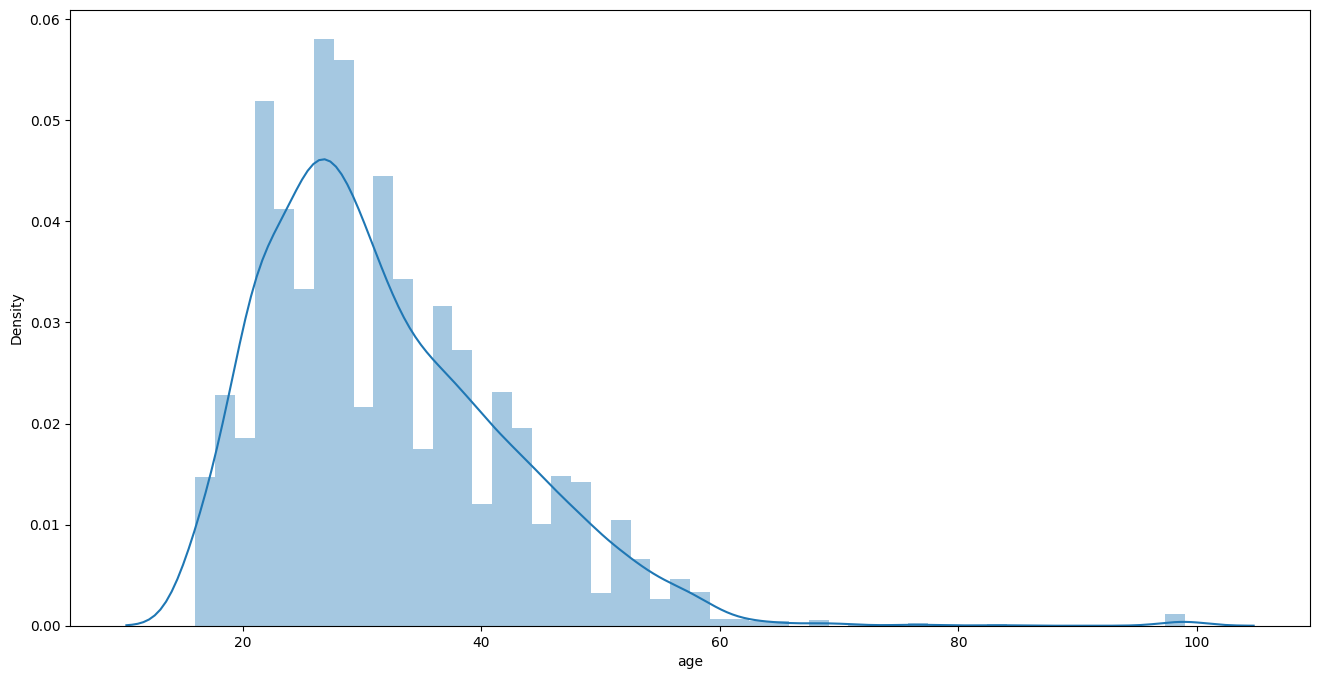

In [77]:
# Строим график распределения возраста пользователей в тестовой группе
fig = plt.figure(figsize=(16, 8))
sns.distplot(users_test_c.age)

In [78]:
# Визуально форма распределения не отличается от распределения в контрольной группе, применим критерий Манна-Уитни

In [79]:
# H0: распределение показателя в группах не различается
# H1: различается

In [80]:
x_0 = users_test_c.age
y_0 = users_control_1_c.age

In [81]:
mannwhitneyu(x_0, y_0, method='auto')

MannwhitneyuResult(statistic=np.float64(9229795.0), pvalue=np.float64(0.30680267645865966))

In [82]:
# Значение p-value > 0.0071, принимаем H0 - распределение показателя в группах не различается, тестовая группа 
# сформирована корректно, далее будем сравнивать её с контрольной группой №1

In [83]:
# Так как в тестовую группу попали пользователи только из нескольких стран, оставим в тестовой и контрольной группе 
# только те страны, которые есть в обоих

In [84]:
# Получаем уникальные страны из тестовой и контрольной групп
countries_control = set(users_control_1_c['country'].unique())
countries_test = set(users_test_c['country'].unique())

In [85]:
# Страны, которые не пересекаются в двух группах
exclude_countries = countries_control.symmetric_difference(countries_test)

In [86]:
# Исключаем эти страны из датафреймов
users_control_filtered = users_control_1_c[~users_control_1_c['country'].isin(exclude_countries)]
users_test_filtered = users_test_c[~users_test_c['country'].isin(exclude_countries)]

In [87]:
# Посмотрим на данные по транзакциям в контрольной группе №1

In [88]:
transactions_control_1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
1002,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [89]:
transactions_control_1_c = transactions_control_1.copy()

In [90]:
transactions_control_1_c.isna().sum()

uid             630
country         630
joined_at         0
paid_at           0
revenue         630
payment_id      630
from_page       630
product_type    630
dtype: int64

In [91]:
transactions_control_1_c.shape

(1007, 8)

In [92]:
# Удаляем незаполненные строки
transactions_control_1_c = transactions_control_1_c.dropna()

In [93]:
transactions_control_1_c.dtypes

uid             float64
country          object
joined_at        object
paid_at          object
revenue         float64
payment_id      float64
from_page        object
product_type     object
dtype: object

In [94]:
# Приводим к целочисленному типу
transactions_control_1_c[['uid', 'revenue', 'payment_id']] = transactions_control_1_c[['uid', 'revenue', 'payment_id']] \
                                                            .astype(int)

In [95]:
# Столбцы с датами к типу datetime
transactions_control_1_c['joined_at'] = pd.to_datetime(transactions_control_1_c['joined_at'])
transactions_control_1_c['paid_at'] = pd.to_datetime(transactions_control_1_c['paid_at'])

In [96]:
transactions_control_1_c.dtypes

uid                      int64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                  int64
payment_id               int64
from_page               object
product_type            object
dtype: object

In [97]:
# Удаляем дубликаты
transactions_control_1_c = transactions_control_1_c.drop_duplicates()

In [98]:
# Убедимся, что время регистрации и время оплаты корректное
transactions_control_1_c['diff_at'] = transactions_control_1_c.paid_at - transactions_control_1_c.joined_at

transactions_control_corrected = transactions_control_1_c[transactions_control_1_c['diff_at'] >= pd.Timedelta(0)]
transactions_control_corrected.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff_at
0,891319275,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727,147,trial_vip_popup,trial_premium,214 days 02:00:00
1,892421826,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586,147,trial_vip_popup,trial_premium,9 days 00:08:00
2,891822480,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911,19,none,coins,45 days 22:32:00
3,891367521,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456,127,sympathy,other_type,31 days 16:38:00
4,892207959,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261,19,empty_likes,coins,53 days 17:33:00


In [99]:
# Оставляем только те страны, которые пересекаются в тестовой и контрольной группах 
transactions_control_filtered = transactions_control_corrected[~transactions_control_corrected['country']
                                                               .isin(exclude_countries)]

In [100]:
# В рамках А/Б-теста была изменена стоимость Premium-подписки без пробного периода, отберем эти данные
transactions_premium_no_trial_c = transactions_control_filtered.query('product_type == "premium_no_trial"')

In [101]:
# Смотрим, какие платёжные системы использовались при оплате
transactions_premium_no_trial_c.groupby('payment_id', as_index=False).agg(n_payments=('revenue', 'count'))

,payment_id,n_payments
0,0,2
1,68,15
2,147,78


In [102]:
# Далее проверим, совпадают ли эти платёжные системы с системами в тестовой группе

In [103]:
# Посмотрим на данные по транзакциям тестовой группы

In [104]:
# Смотрим на типы данных в датафрейме
transactions_test.dtypes

uid              int64
country         object
joined_at       object
paid_at         object
revenue          int64
payment_id       int64
from_page       object
product_type    object
dtype: object

In [105]:
# Приводим столбцы с датами к типу datetime
transactions_test['joined_at'] = pd.to_datetime(transactions_test['joined_at'])
transactions_test['paid_at'] = pd.to_datetime(transactions_test['paid_at'])

In [106]:
# Проверяем
transactions_test.dtypes

uid                      int64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                  int64
payment_id               int64
from_page               object
product_type            object
dtype: object

In [107]:
# Удаляем дубликаты
transactions_test_not_d = transactions_test.drop_duplicates()

In [108]:
# Проверим корректность времени регистрации и времени оплаты
transactions_test_not_d['diff_at'] = transactions_test_not_d.paid_at - transactions_test_not_d.joined_at

transactions_test_corrected = transactions_test_not_d[transactions_test_not_d['diff_at'] >= pd.Timedelta(0)]
transactions_test_corrected.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11124\1187740791.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,diff_at
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium,186 days 02:04:00
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium,8 days 01:04:00
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type,4 days 23:06:00
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type,9 days 21:29:00
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium,8 days 02:00:00


In [109]:
# Оставляем только те страны, которые пересекаются в тестовой и контрольной группах 
transactions_test_filtered = transactions_test_corrected[~transactions_test_corrected['country']
                            .isin(exclude_countries)]

In [110]:
# Отбираем данные по премиум-подписке без пробного периода
transactions_premium_no_trial_t = transactions_test_filtered.query('product_type == "premium_no_trial"')

In [111]:
# Смотрим, какие платёжные системы использовались при оплате
transactions_premium_no_trial_t.groupby('payment_id', as_index=False).agg(n_payments=('revenue', 'count'))

,payment_id,n_payments
0,0,1
1,68,10
2,147,53


In [112]:
# Платёжные системы совпадают в тестовой и контрольной группах. Через платёжную систему с id 0 был выполнен всего один 
# платёж в тестовой группе и два платежа в контрольной группе, можем предположить, что эта система не относится к двум 
# новым платёжным системам, которые мы тестируем в рамках нашего эксперимента. Для дальнейшего анализа отберём платёжные 
# системы с id 68 и 147

In [113]:
new_payment_systems = [68, 147]

In [114]:
# Оставляем только две новые платёжные системы для анализа в тестовой группе
df_transactions_t = transactions_premium_no_trial_t.query('payment_id == @new_payment_systems')

In [115]:
# Оставляем только две новые платёжные системы для анализа в контрольной группе
df_transactions_c = transactions_premium_no_trial_c.query('payment_id == @new_payment_systems')

In [116]:
# Найдем id пользователей, которые не оплачивали "premium no trial", оплачивали другие типы продукта, чтобы исключить их 
# из датафрейма по пользователям для дальнейшего анализа

In [117]:
# В контрольной группе

In [118]:
# id пользователей, которые оплачивали премиум-подписку без пробного периода
uid_premium_c = set(df_transactions_c['uid'].unique())

In [119]:
# Типы продукта, которые мы исключаем
exclude_product_type = ['coins', 'other_type', 'trial_premium']

In [120]:
# id пользователей, которые оплачивали в том числе типы продукта, которые мы исключаем 
uid_exclude_product_type_c = set(transactions_control_filtered.query('product_type == @exclude_product_type')['uid']
                            .unique())

In [121]:
# id пользователей, которые оплачивали только другие типы продукта, не "premium no trial"
exclude_uid_с = uid_exclude_product_type_c - uid_premium_c

In [122]:
# Исключаем этих пользователей из датафрейма
df_users_control = users_control_filtered[~users_control_filtered['uid'].isin(exclude_uid_с)]

In [123]:
# Рассчитываем среднюю выручку на каждого пользователя, платящего за "premium no trial"
avg_revenue_c = df_transactions_c.groupby('uid', as_index=False).agg(avg_revenue_premium=('revenue', 'mean'))

In [124]:
# Добавляем колонку с этими данными в датафрейм по пользователям
df_total_users_control = pd.merge(df_users_control, avg_revenue_c, on='uid', how='left')

In [125]:
# Пропущенные значения меняем на 0 
df_total_users_control.avg_revenue_premium.fillna(0, inplace=True)
df_total_users_control['avg_revenue_premium'] = df_total_users_control['avg_revenue_premium'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_11124\1982405686.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [126]:
df_total_users_control.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,avg_revenue_premium
0,892319115,25,435,0,United States of America,"1,2,3,4,5,6",female,22,32,982,False,False,0,0
1,891248523,29,500,0,United States of America,"1,2",male,26,32,12,False,False,0,0
2,891670932,33,800,0,France,"1,2,3,5,6,8,9,11,13,16",male,30,36,5,False,False,0,0


In [127]:
# Произведем эти же изменения в тестовой группе

In [128]:
# id пользователей, которые оплачивали премиум-подписку без пробного периода
uid_premium_t = set(df_transactions_t['uid'].unique())

In [129]:
# id пользователей, которые оплачивали в том числе типы продукта, которые мы исключаем 
uid_exclude_product_type_t = set(transactions_test_filtered.query('product_type == @exclude_product_type')['uid']
                            .unique())

In [130]:
# id пользователей, которые оплачивали только другие типы продукта, не "premium no trial"
exclude_uid_t = uid_exclude_product_type_t - uid_premium_t

In [131]:
# Исключаем этих пользователей из датафрейма
df_users_test = users_test_filtered[~users_test_filtered['uid'].isin(exclude_uid_t)]

In [132]:
# Рассчитываем среднюю выручку на каждого пользователя, платящего за "premium no trial"
avg_revenue_t = df_transactions_t.groupby('uid', as_index=False).agg(avg_revenue_premium=('revenue', 'mean'))

In [133]:
# Добавляем колонку с этими данными в датафрейм по пользователям
df_total_users_test = pd.merge(df_users_test, avg_revenue_t, on='uid', how='left')

In [134]:
# Пропущенные значения меняем на 0 
df_total_users_test.avg_revenue_premium.fillna(0, inplace=True)
df_total_users_test['avg_revenue_premium'] = df_total_users_test['avg_revenue_premium'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_11124\1974782558.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [135]:
df_total_users_test.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,avg_revenue_premium
0,892309896,27,685,0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",male,24,30,89,False,False,0,0
1,892044516,27,0,0,Germany,NaN,male,24,30,0,False,False,0,0
2,892185708,45,44,0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",male,42,48,68,False,False,0,0


In [136]:
# Опираясь на данные, обозначим ключевые метрики для эксперимента:
# Целевая метрика: ARPU — средняя выручка на пользователя по продукту Premium no trial
# Прокси-метрика: Conversion to Premium no trial
# Барьерная метрика: ARPPU — средняя выручка на пользователя, платящего за Premium no trial

In [136]:
# Этап №2. Рассчитаем метрики для контрольной группы №1

C:\Users\User\AppData\Local\Temp\ipykernel_11124\3458289498.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='avg_revenue_premium', ylabel='Density'>

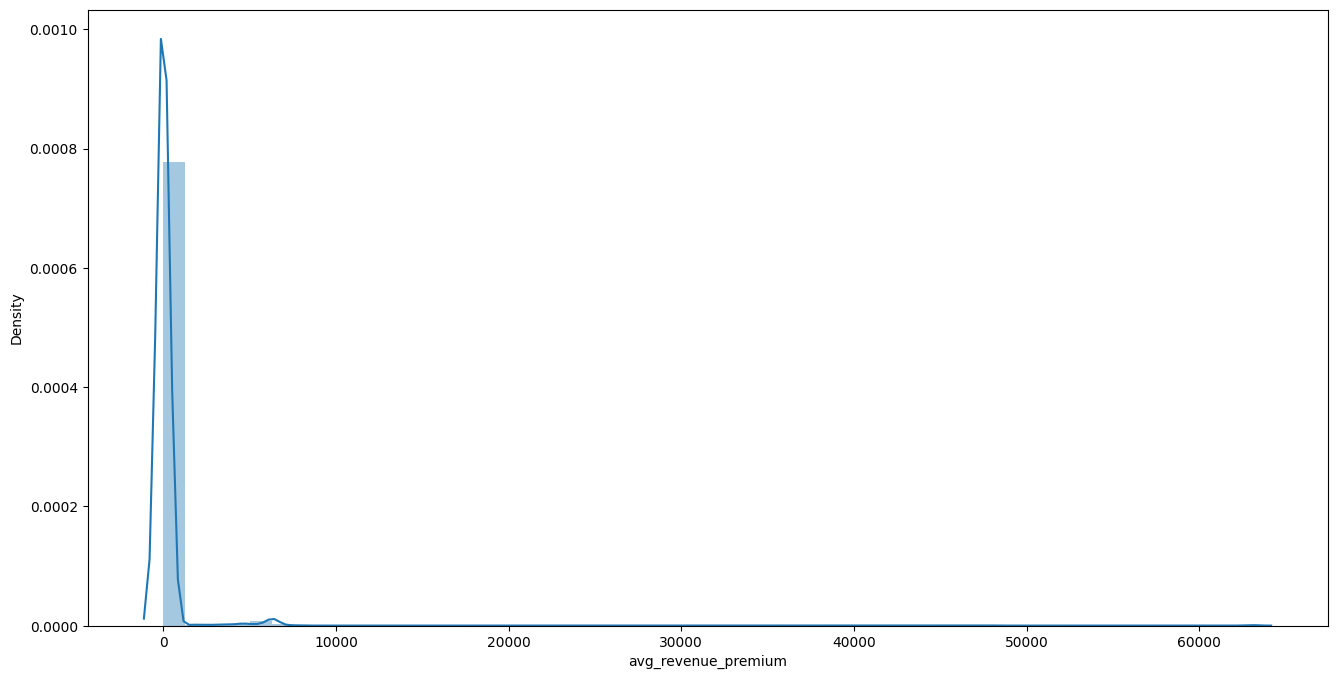

In [137]:
# Посмотрим на распределение средней выручки по продукту Premium no trial в контрольной группе №1
fig = plt.figure(figsize=(16, 8))
sns.distplot(df_total_users_control.avg_revenue_premium)

In [138]:
# Распределение с сильным пиком в начале графика и с большими выбросами

In [139]:
# Рассчитаем ARPU для контрольной группы

In [140]:
# Считаем общее число пользователей 
total_users_control_1 = df_total_users_control.uid.nunique()
total_users_control_1

4250

In [141]:
# ARPU контрольной группы
ARPU_control_1 = round(df_total_users_control.avg_revenue_premium.sum() / total_users_control_1, 2)
ARPU_control_1

np.float64(161.7)

In [142]:
# Посмотрим на распределение без выбросов

In [143]:
df_total_users_control_copy = df_total_users_control.copy()

In [144]:
upper_bound_c = df_total_users_control_copy['avg_revenue_premium'].quantile(0.999)

In [145]:
df_filtered_c = df_total_users_control_copy[df_total_users_control_copy['avg_revenue_premium'] <= upper_bound_c]

C:\Users\User\AppData\Local\Temp\ipykernel_11124\3345800109.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='avg_revenue_premium', ylabel='Density'>

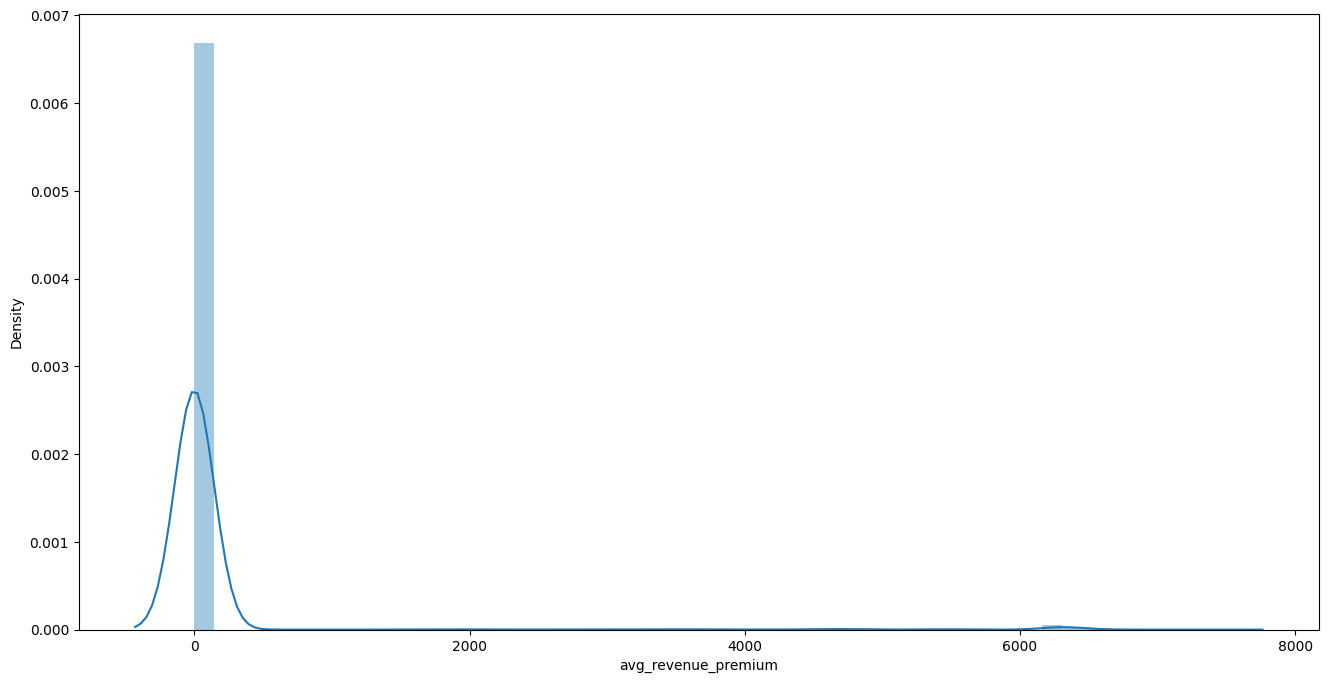

In [146]:
fig = plt.figure(figsize=(16, 8))
sns.distplot(df_filtered_c.avg_revenue_premium)

In [147]:
# Форму распределения получилось сгладить, рассчитаем новое значение ARPU 

In [148]:
# Считаем общее число пользователей без выбросов
total_users_control_2 = df_filtered_c.uid.nunique()
total_users_control_2

4245

In [149]:
# Посмотрим на разницу в количестве пользователей
total_users_control_1 - total_users_control_2

5

In [150]:
# ARPU контрольной группы без выбросов
ARPU_control_2 = round(df_filtered_c.avg_revenue_premium.sum() / total_users_control_2, 2)
ARPU_control_2

np.float64(104.24)

In [152]:
# Сравним с ARPU, рассчитанным с выбросами
round(ARPU_control_1 - ARPU_control_2, 2)

np.float64(57.46)

In [153]:
# Видим, как всего 5 аномальных значений в данных завысили значение ARPU

In [154]:
# Рассчитаем Сonversion to premium no trial в контрольной группе №1

In [155]:
# Количество платящих пользователей
paying_users_control_1 = df_transactions_c.uid.nunique()
paying_users_control_1

89

In [156]:
# Сonversion to premium no trial
conversion_to_premium_c1 = round(paying_users_control_1 / total_users_control_1 * 100, 2)
conversion_to_premium_c1

2.09

C:\Users\User\AppData\Local\Temp\ipykernel_11124\880578083.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='avg_revenue_premium', ylabel='Density'>

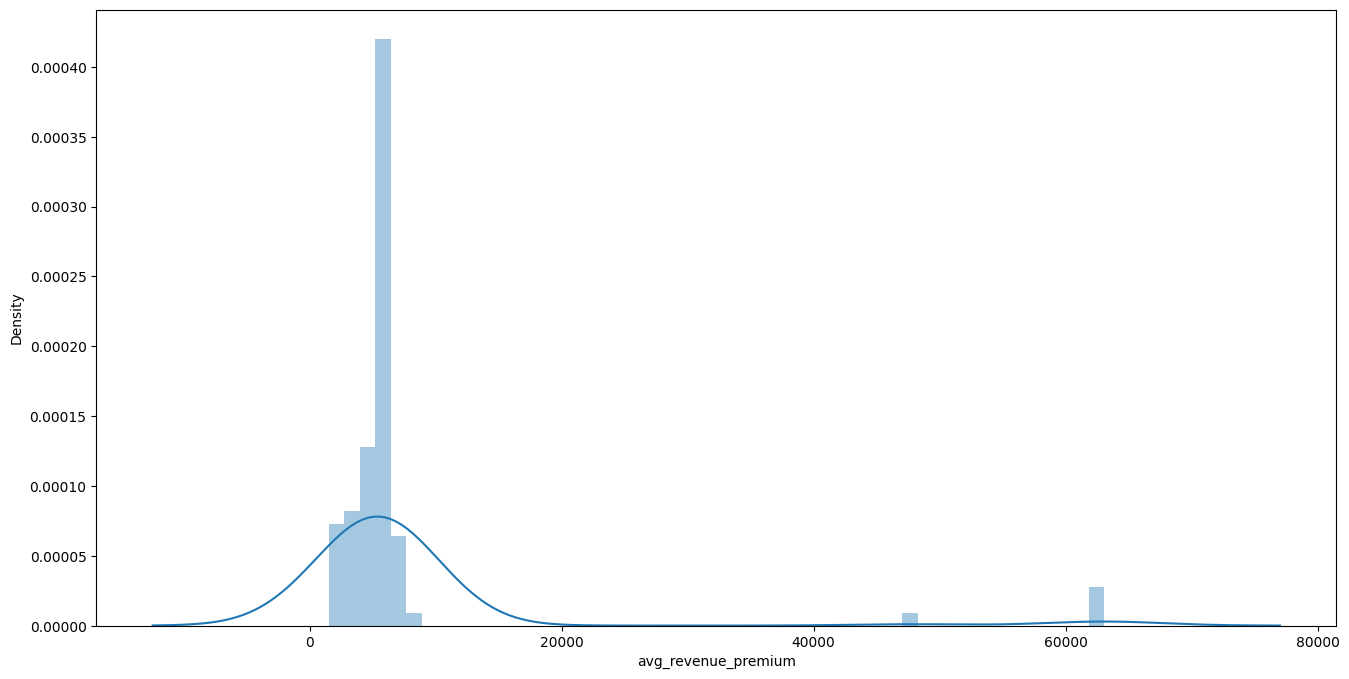

In [157]:
# Посмотрим на распределение средней выручки на платящих за «premium no trial» в контрольной группе №1
fig = plt.figure(figsize=(16, 8))
sns.distplot(avg_revenue_c.avg_revenue_premium)

In [158]:
# Также наблюдается высокая плотность в начале графика и большие выбросы

In [159]:
# Рассчитаем ARPPU в контрольной группе
ARPPU_control = round(df_total_users_control.avg_revenue_premium.sum() / paying_users_control_1, 2)
ARPPU_control

np.float64(7721.84)

In [160]:
# Посмотрим на распределение без выбросов и рассчитаем новое значение ARPPU

In [161]:
avg_revenue_c_copy = avg_revenue_c.copy()

In [162]:
upper_bound_paying_c = avg_revenue_c_copy['avg_revenue_premium'].quantile(0.96)

In [163]:
df_filtered_paying_c = avg_revenue_c_copy[avg_revenue_c_copy['avg_revenue_premium'] <= upper_bound_paying_c]

C:\Users\User\AppData\Local\Temp\ipykernel_11124\1750929061.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='avg_revenue_premium', ylabel='Density'>

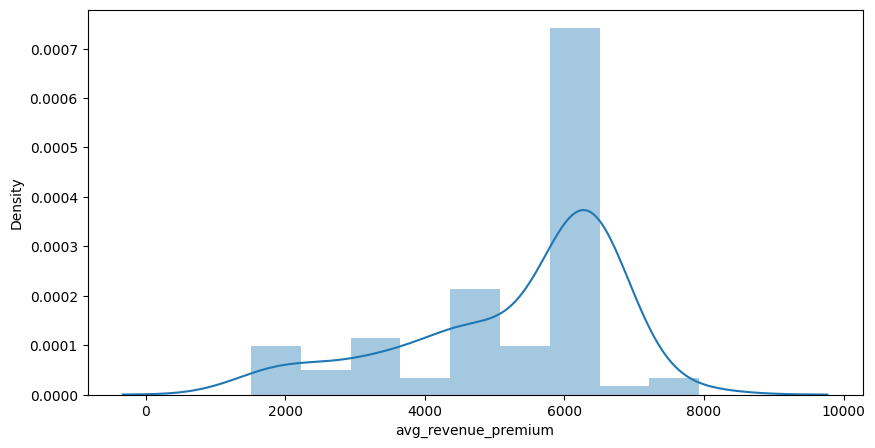

In [164]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_filtered_paying_c.avg_revenue_premium)

In [165]:
# Отсутствие выбросов сместило график распределения вправо

In [166]:
# Количество платящих пользователей без выбросов
paying_users_control_2 = df_filtered_paying_c.uid.nunique()
paying_users_control_2

85

In [167]:
# Рассчитаем разницу в количестве пользователей
paying_users_control_1 - paying_users_control_2

4

In [168]:
# Рассчитаем ARPPU в контрольной группе без выбросов
ARPPU_control_2 = round(df_filtered_paying_c.avg_revenue_premium.sum() / paying_users_control_2, 2)
ARPPU_control_2

np.float64(5298.95)

In [169]:
# Сравним с ARPPU, рассчитанным с выбросами
round(ARPPU_control - ARPPU_control_2, 2)

np.float64(2422.89)

In [170]:
# Наблюдаем, как сильно завысили ARPPU всего 4 аномальных значения

In [171]:
# Этап №3. Рассчитаем метрики для тестовой группы и сравним их с метриками контрольной группы

C:\Users\User\AppData\Local\Temp\ipykernel_11124\1685677010.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='avg_revenue_premium', ylabel='Density'>

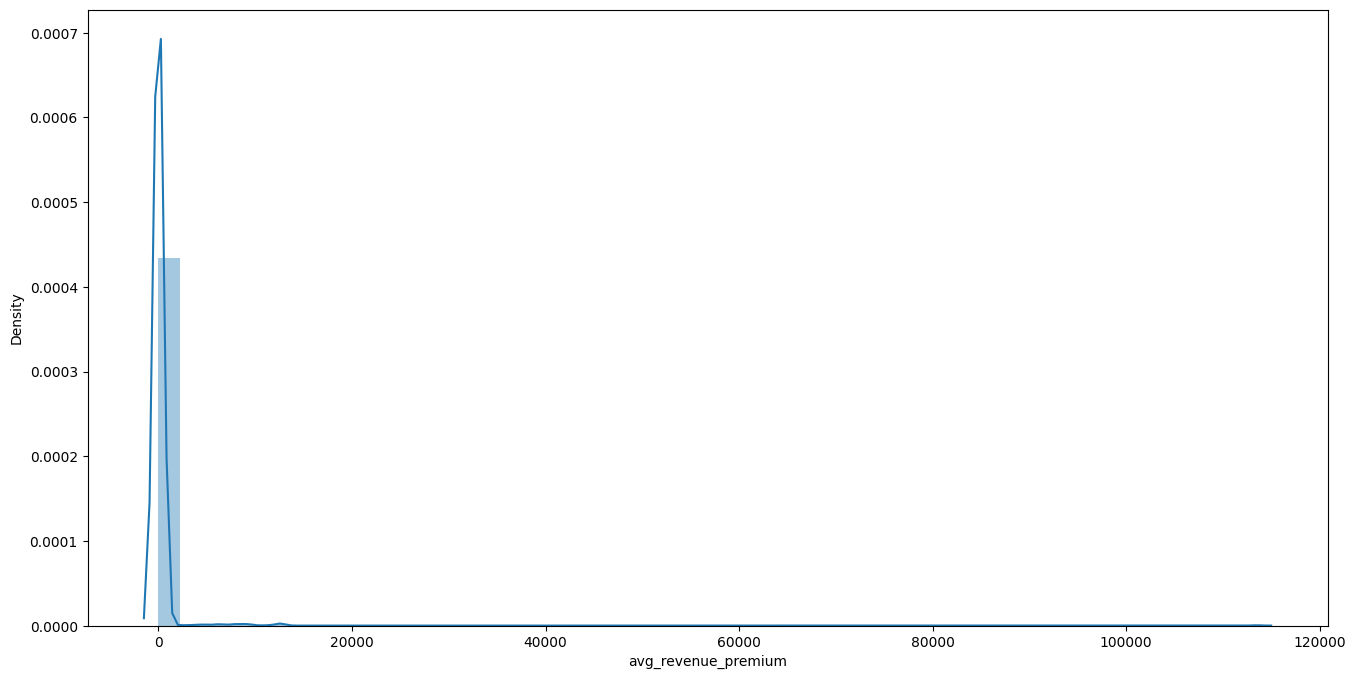

In [172]:
# Построим график распределения средней выручки по продукту Premium no trial в тестовой группе
fig = plt.figure(figsize=(16, 8))
sns.distplot(df_total_users_test.avg_revenue_premium)

In [173]:
# Распределение аналогично распределению показателя в контрольной группе, сильный пик нулевого значения

In [174]:
# Рассчитаем ARPU тестовой группы

In [175]:
# Общее число пользователей
total_users_test = df_total_users_test.uid.nunique()
total_users_test

4212

In [176]:
# ARPU тестовой группы
ARPU_test = round(df_total_users_test.avg_revenue_premium.sum() / total_users_test, 2)
ARPU_test

np.float64(163.75)

In [177]:
# Сравним с ARPU в контрольной группе
ARPU_control_1

np.float64(161.7)

In [178]:
# Мы наблюдаем, что в тестовой группе показатель ARPU выше, определим, значимое ли это различие, применив Bootstrap

In [179]:
# Скорректированный уровень значимости
alpha_corr

0.0071

In [180]:
# Доверительный интервал
(1 - alpha_corr) * 100

99.29

In [181]:
# H0: ARPU в тестовой и контрольной группах не различается
# H1: различие есть

In [182]:
# DataFrame со значениями averege revenue в тестовой группе
df_avg_revenue_test = df_total_users_test.avg_revenue_premium.to_frame()

In [183]:
# DataFrame со значениями averege revenue в контрольной группе
df_avg_revenue_control = df_total_users_control.avg_revenue_premium.to_frame()

In [184]:
# Рассчитываем разницу между ARPU в тестовой и контрольной группах, повторяем 10000 раз, результат заносим в список
mean_diff = []

for i in range(10000):
    sample_data_control = df_avg_revenue_control.sample(frac=1, replace=True)
    sample_mean_control = sample_data_control.avg_revenue_premium.mean()
    
    sample_data_test = df_avg_revenue_test.sample(frac=1, replace=True)
    sample_mean_test = sample_data_test.avg_revenue_premium.mean()
    
    sample_mean_diff = sample_mean_control - sample_mean_test
    mean_diff.append(sample_mean_diff)

In [185]:
# Строим 99.29% доверительный интервал для разности ARPU в двух группах

In [186]:
# Левая граница доверительного интервала
pd.Series(mean_diff).quantile(0.00355)

np.float64(-153.7839302313781)

In [187]:
# Правая граница доверительного интервала
pd.Series(mean_diff).quantile(0.99645)

np.float64(128.60660522705402)

In [188]:
# Вывод: 0 попадает в доверительный интервал, следовательно, разница между ARPU в тестовой и контрольной группах 
# статистически незначима, принимаем H0

In [189]:
# Теперь посмотрим на распределение средней выручки по продукту Premium no trial в тестовой группе без выбросов

In [190]:
df_total_users_test_copy = df_total_users_test.copy()

In [191]:
upper_bound_t = df_total_users_test_copy['avg_revenue_premium'].quantile(0.999)

In [192]:
df_filtered_t = df_total_users_test_copy[df_total_users_test_copy['avg_revenue_premium'] <= upper_bound_t]

C:\Users\User\AppData\Local\Temp\ipykernel_11124\2037575046.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='avg_revenue_premium', ylabel='Density'>

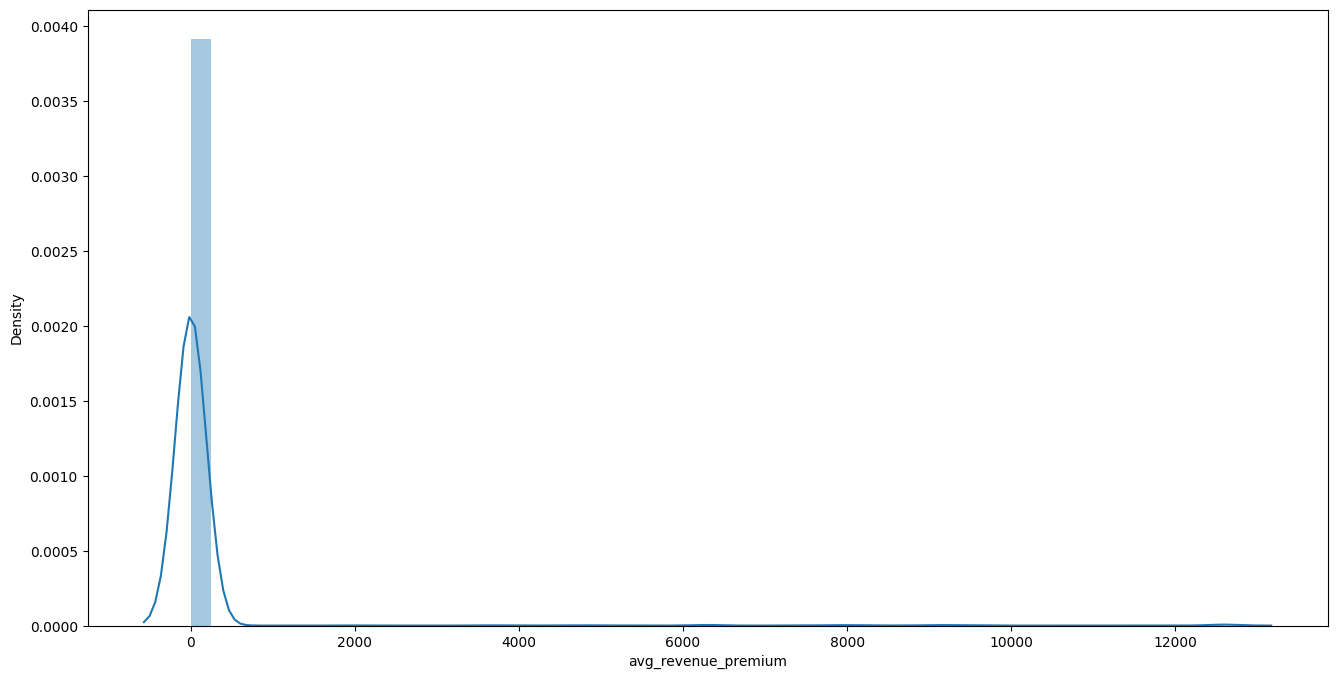

In [193]:
fig = plt.figure(figsize=(16, 8))
sns.distplot(df_filtered_t.avg_revenue_premium)

In [194]:
# Форму распределения сгладили, рассчитаем новое значение ARPU 

In [195]:
# Считаем общее число пользователей без выбросов
total_users_test_2 = df_filtered_t.uid.nunique()
total_users_test_2

4210

In [196]:
# Посмотрим на разницу в количестве пользователей
total_users_test - total_users_test_2

2

In [197]:
# ARPU тестовой группы без выбросов
ARPU_test_2 = round(df_filtered_t.avg_revenue_premium.sum() / total_users_test_2, 2)
ARPU_test_2

np.float64(109.92)

In [198]:
# Сравним с ARPU, рассчитанным с выбросами
round(ARPU_test - ARPU_test_2, 2)

np.float64(53.83)

In [199]:
# Видим, как всего 2 аномальных значения в данных завысили значение ARPU

In [200]:
# Проверим, повлияли ли выбросы на результаты статистического теста. Сравним ARPU тестовой и контрольной групп, 
# рассчитанный без выбросов с помощью Bootstrap

In [201]:
# H0: ARPU в тестовой и контрольной группах не различается
# H1: различие есть

In [202]:
# DataFrame со значениями averege revenue в тестовой группе
data_avg_revenue_test = df_filtered_t.avg_revenue_premium.to_frame()

In [203]:
# DataFrame со значениями averege revenue в контрольной группе
data_avg_revenue_control = df_filtered_c.avg_revenue_premium.to_frame()

In [204]:
# Рассчитываем разницу между ARPU в тестовой и контрольной группах, повторяем 10000 раз, результат заносим в список
mean_diff_1 = []

for i in range(10000):
    sample_data_control_1 = data_avg_revenue_control.sample(frac=1, replace=True)
    sample_mean_control_1 = sample_data_control_1.avg_revenue_premium.mean()
    
    sample_data_test_1 = data_avg_revenue_test.sample(frac=1, replace=True)
    sample_mean_test_1 = sample_data_test_1.avg_revenue_premium.mean()
    
    sample_mean_diff_1 = sample_mean_control_1 - sample_mean_test_1
    mean_diff_1.append(sample_mean_diff_1)

In [205]:
# Строим 99.29% доверительный интервал для разности ARPU в двух группах без выбросов

In [206]:
# Левая граница доверительного интервала
pd.Series(mean_diff_1).quantile(0.00355)

np.float64(-61.82822416478518)

In [207]:
# Правая граница доверительного интервала
pd.Series(mean_diff_1).quantile(0.99645)

np.float64(45.48548045227155)

In [208]:
# Вывод: 0 попадает в доверительный интервал, следовательно, разница между ARPU в тестовой и контрольной группах 
# статистически незначима, принимаем H0, выбросы на результат статистического теста не повлияли

In [209]:
# Рассчитаем Conversion to Premium no trial тестовой группы

In [210]:
# Количество платящих пользователей
paying_users_test = df_transactions_t.uid.nunique()
paying_users_test

59

In [211]:
# Conversion to Premium no trial в тестовой группе
conversion_to_premium_t = round(paying_users_test / total_users_test * 100, 2)
conversion_to_premium_t

1.4

In [212]:
# Сравним с Сonversion to premium no trial в контрольной группе
conversion_to_premium_c1

2.09

In [213]:
# Наблюдается снижение показателя в тестовой группе, проверим значимость различия, применив критерий хи-квадрат

In [214]:
# H0: Сonversion to premium no trial в группах не различается
# H1: различие есть 

In [215]:
# Подготовим DataFrame для теста

In [216]:
df_transactions_t['premium'] = 'premium'

C:\Users\User\AppData\Local\Temp\ipykernel_11124\756170289.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
df_total_users_test['premium'] = df_total_users_test.avg_revenue_premium \
                                    .apply(lambda x: 'premium' if x > 0 else 'not_premium')

In [218]:
df_total_users_test['group'] = 'test'

In [219]:
df_1 = pd.merge(df_total_users_test, df_transactions_t, on=['uid', 'premium'], how='left')[['uid', 'premium', 'group']]

In [220]:
df_test = df_1.drop_duplicates()

In [221]:
df_transactions_c['premium'] = 'premium'

C:\Users\User\AppData\Local\Temp\ipykernel_11124\3295527999.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [227]:
df_total_users_control['premium'] = df_total_users_control.avg_revenue_premium \
                                        .apply(lambda x: 'premium' if x > 0 else 'not_premium')

In [225]:
df_total_users_control['group'] = 'control'

In [228]:
df_2 = pd.merge(df_total_users_control, df_transactions_c, on=['uid', 'premium'], how='left') \
                [['uid', 'premium', 'group']]

In [229]:
df_control = df_2.drop_duplicates()

In [230]:
df_total = pd.merge(df_control, df_test, on=['uid', 'premium', 'group'], how='outer')
df_total.head()

,uid,premium,group
0,891050997,not_premium,control
1,891051147,not_premium,test
2,891051552,not_premium,control
3,891051606,not_premium,control
4,891052698,not_premium,control


In [231]:
# На основе датафрейма создаем кросс-таблицу
df_chi2 = pd.crosstab(df_total.group, df_total.premium)
df_chi2

premium,not_premium,premium
group,,
control,4161,89
test,4153,59


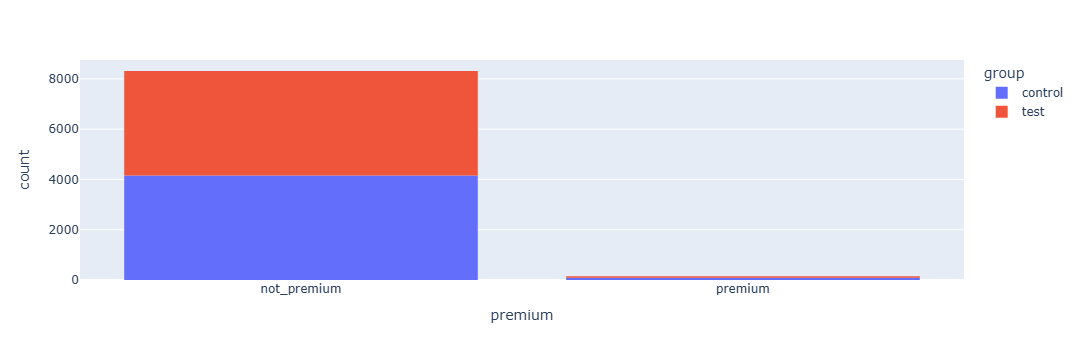

In [232]:
# Построим график соотношений
fig = px.histogram(df_total[['premium', 'group']], x='premium', color='group')
fig.show()

In [233]:
# Наглядно наблюдаем, как мала доля пользователей, оплачивающих premium-подписку без пробного периода.
# Разница в тестовой и контрольной группах едва заметна

In [234]:
# Проводим тест
stat, p, dof, expectend = chi2_contingency(df_chi2)
stat, p

(np.float64(5.521641147509876), np.float64(0.018782629888588507))

In [235]:
# Вывод: значение p-value > 0.0071 (скорректированный уровень значимости), принимаем H0 — показатель конверсии в группах 
# значимо не различается

C:\Users\User\AppData\Local\Temp\ipykernel_11124\2085391751.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='avg_revenue_premium', ylabel='Density'>

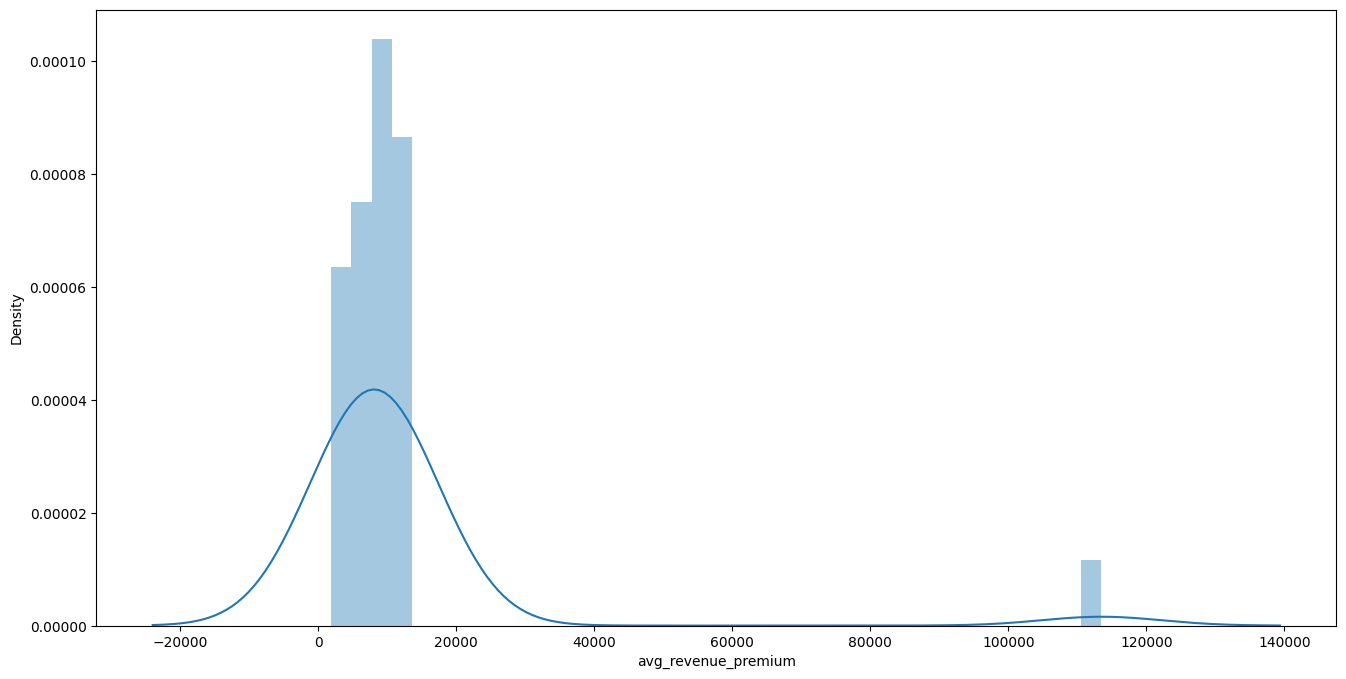

In [236]:
# Посмотрим на распределение средней выручки на платящих за «premium no trial» в тестовой группе
fig = plt.figure(figsize=(16, 8))
sns.distplot(avg_revenue_t.avg_revenue_premium)

In [237]:
# Форма распределения аналогична форме в контрольной группе

In [238]:
# Рассчитаем ARPPU в тестовой группе
ARPPU_test = round(df_total_users_test.avg_revenue_premium.sum() / paying_users_test, 2)
ARPPU_test

np.float64(11690.15)

In [239]:
# Сравним с ARPPU в контрольной группе
ARPPU_control

np.float64(7721.84)

In [240]:
# Разница показателя
round(ARPPU_test - ARPPU_control, 2)

np.float64(3968.31)

In [241]:
# Мы видим, как значительно увеличилось значение ARPPU в тестовой группе, определим, значимо ли это различие, 
# применив Bootstrap

In [242]:
# H0: ARPPU в тестовой и контрольной группах не различается
# H1: различие есть

In [243]:
# DataFrame со значениями averege revenue в тестовой группе
df_avg_revenue_test = df_total_users_test.avg_revenue_premium.to_frame()

In [244]:
# DataFrame со значениями averege revenue в контрольной группе
df_avg_revenue_control = df_total_users_control.avg_revenue_premium.to_frame()

In [245]:
# Рассчитываем разницу между ARPPU в тестовой и контрольной группах, повторяем 10000 раз, результат заносим в список
mean_diff_2 = []

for i in range(10000):
    sample_data_control_2 = df_avg_revenue_control.sample(frac=1, replace=True)
    sample_mean_control_2 = sample_data_control_2.avg_revenue_premium.sum() / paying_users_control_1
    
    sample_data_test_2 = df_avg_revenue_test.sample(frac=1, replace=True)
    sample_mean_test_2 = sample_data_test_2.avg_revenue_premium.sum() / paying_users_test
    
    sample_mean_diff_2 = sample_mean_control_2 - sample_mean_test_2
    mean_diff_2.append(sample_mean_diff_2)

In [242]:
# Строим 99.29% доверительный интервал для разности ARPPU в двух группах

In [243]:
# Левая граница доверительного интервала
pd.Series(mean_diff_2).quantile(0.00355)

-14261.309410217102

In [244]:
# Правая граница доверительного интервала
pd.Series(mean_diff_2).quantile(0.99645)

3655.703901923435

In [246]:
# Вывод: 0 попадает в доверительный интервал, следовательно, разница между ARPPU в тестовой и контрольной группах 
# статистически незначима, принимаем H0

In [247]:
# Посмотрим на распределение средней выручки на платящих за «premium no trial» в тестовой группе без выбросов

In [248]:
avg_revenue_t_copy = avg_revenue_t.copy()

In [249]:
upper_bound_paying_t = avg_revenue_t_copy['avg_revenue_premium'].quantile(0.96)

In [250]:
df_filtered_paying_t = avg_revenue_t_copy[avg_revenue_t_copy['avg_revenue_premium'] <= upper_bound_paying_t]

C:\Users\User\AppData\Local\Temp\ipykernel_11124\3292760905.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='avg_revenue_premium', ylabel='Density'>

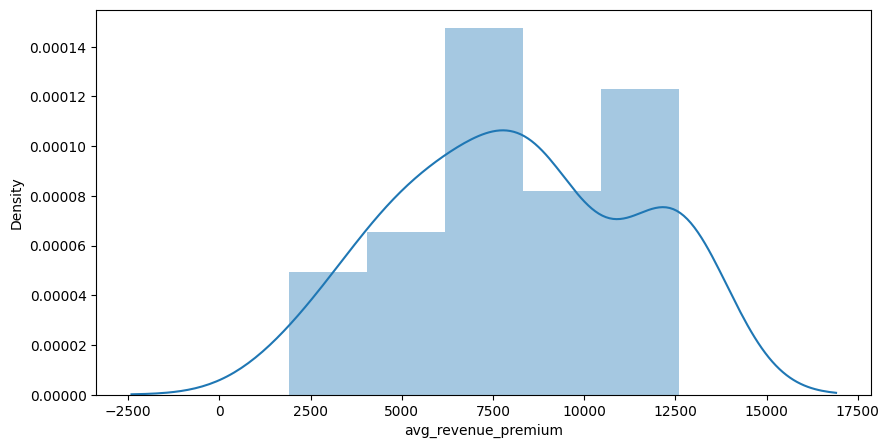

In [251]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_filtered_paying_t.avg_revenue_premium)

In [252]:
# Отсутствие выбросов сместило распределение показателя в центр графика 

In [253]:
# Количество платящих пользователей без выбросов
paying_users_test_2 = df_filtered_paying_t.uid.nunique()
paying_users_test_2

57

In [254]:
# Рассчитаем разницу в количестве пользователей
paying_users_test - paying_users_test_2

2

In [255]:
# Рассчитаем ARPPU в тестовой группе без выбросов
ARPPU_test_2 = round(df_filtered_paying_t.avg_revenue_premium.sum() / paying_users_test_2, 2)
ARPPU_test_2

np.float64(8118.69)

In [256]:
# Сравним с ARPPU, рассчитанным с выбросами
round(ARPPU_test - ARPPU_test_2, 2)

np.float64(3571.46)

In [257]:
# Наблюдаем, как сильно завысили ARPPU всего 2 аномальных значения

In [258]:
# Проверим, повлияли ли выбросы на результаты статистического теста. Сравним ARPPU тестовой и контрольной групп, 
# рассчитанный без выбросов с помощью Bootstrap

In [259]:
# H0: ARPPU в тестовой и контрольной группах не различается
# H1: различие есть

In [260]:
# DataFrame со значениями averege revenue в тестовой группе
data_paying_test = df_filtered_paying_t.avg_revenue_premium.to_frame()

In [261]:
# DataFrame со значениями averege revenue в контрольной группе
data_paying_control = df_filtered_paying_c.avg_revenue_premium.to_frame()

In [262]:
# Рассчитываем разницу между ARPPU в тестовой и контрольной группах, повторяем 10000 раз, результат заносим в список
mean_diff_3 = []

for i in range(10000):
    sample_data_control_3 = data_paying_control.sample(frac=1, replace=True)
    sample_mean_control_3 = sample_data_control_3.avg_revenue_premium.sum() / paying_users_control_2
    
    sample_data_test_3 = data_paying_test.sample(frac=1, replace=True)
    sample_mean_test_3 = sample_data_test_3.avg_revenue_premium.sum() / paying_users_test_2
    
    sample_mean_diff_3 = sample_mean_control_3 - sample_mean_test_3
    mean_diff_3.append(sample_mean_diff_3)

In [263]:
# Строим 99.29% доверительный интервал для разности ARPPU в двух группах

In [264]:
# Левая граница доверительного интервала
pd.Series(mean_diff_3).quantile(0.00355)

np.float64(-4017.235091718266)

In [265]:
# Правая граница доверительного интервала
pd.Series(mean_diff_3).quantile(0.99645)

np.float64(-1640.8607239215717)

In [266]:
# Вывод: 0 не попадает в доверительный интервал, следовательно, разница между ARPPU в тестовой и контрольной группах 
# статистически значима, принимаем H1. ARPPU в тестовой группе значимо увеличилось. Отсутствие выбросов в данных 
# повлияло на результаты статистического теста

In [268]:
# Заключение

# Мы провели A/B-тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость 
# премиум-подписки при покупке через две новые платежные системы. 

# Были сформированы ключевые метрики для проведения эксперимента:

# Целевая метрика: ARPU — средняя выручка на пользователя по продукту Premium no trial;
# Прокси-метрика: Conversion to Premium no trial;
# Барьерная метрика: ARPPU — средняя выручка на пользователя, платящего за Premium no trial.
    
# На первом этапе эксперимента мы провели А/А-тест, сравнили две контрольные группы пользователей по распределению 
# их возраста с помощью критерия Манна–Уитни и по распределению полов пользователей, применив хи-квадрат. Также 
# в рамках А/А-теста была выполнена поправка на множественные сравнения Бонферрони, скорректировали уровень значимости 
# до 0.025. Убедились в корректности рандомизации при формировании контрольных групп.

# Так как для сравнения тестовой и контрольной групп мы определили семь тестов, сделали поправку на множественные 
# сравнения Бонферрони, скорректировали уровень статистической значимости до уровня 0.0071.

# Сравнили тестовую и контрольную группу по распределению возраста, применив критерий Манна-Уитни, и по распределению 
# полов пользователей с помощью хи-квадрата. Получили подтверждение корректно сформированной выборки для дальнейшего 
# сравнения.

# Статистическая значимость разницы ARPU в тестовой и контрольной группах была проверена методом Bootstrap, была принята 
# нулевая гипотеза об отсутствии значимого различия. Затем были исключены выбросы из данных, и тест был выполнен повторно, 
# но на результаты это не повлияло, отсутствие выбросов не дало значимого результата.

# Не обнаружили статистически значимое различие и в показателе Conversion to Premium no trial с помощью критерия 
# хи-квадрат.

# Также провели два теста сравнения ARPPU в тестовой и контрольной группе с выбросами и без, применив Bootstrap. 
# Только тест без выбросов показал значимое различие.

# Из проведенного эксперимента следует, что изменение стоимости премиум-подписки при покупке через две новые платежные 
# системы не повлияло положительно на метрики, ARPU и Conversion to Premium no trial не изменились, а ARPPU значимо 
# увеличилось при исключенных выбросах, но данная метрика не является для нас целевой.